# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\trevg\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key=os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
news_api_client=NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
news_bitcoin=news_api_client.get_everything(q='bitcoin', language='en')

In [5]:
# Fetch the Ethereum news articles
news_ethereum=news_api_client.get_everything(q='ethereum', language='en')

In [6]:
#checking bitcoin and Ethereum article numbers
print(news_bitcoin['totalResults'])
print(news_ethereum['totalResults'])

9774
4725


In [7]:
# Create the DataFrame to be used for the articles
def create_df(crypto_news):
    articles=[]
    for article in crypto_news:
        try:
            title=article['title']
            text=article['content']
            date=article['publishedAt'][:10]
            description=article['description']
            
            articles.append({
                'date':date,
                'title':title,
                'description':description,
                'text':text,
                })
        except AttributeError:
            pass
        
    return pd.DataFrame(articles)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df=create_df(news_bitcoin['articles'])

In [9]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df=create_df(news_ethereum['articles'])

In [10]:
# generate sentiment from compound score
def get_sentiment(score):
    result=0
    if score>=0.05:
        result=1
    elif score<=-0.05:
        result=-1
    return result

In [11]:
# Describe the Bitcoin Sentiment
#creating dictionaies
sentiment_text={"text_compound": [],
                    "text_pos": [],
                    "text_neu": [],
                    "text_neg": [],
                    "text_sent": [],
               }
#generate sentiment score for Bitcoin
for index, row in bitcoin_df.iterrows():
    try:
        sentiment_scores=analyzer.polarity_scores(row['text'])
        sentiment_text["text_compound"].append(sentiment_scores["compound"])
        sentiment_text["text_pos"].append(sentiment_scores["pos"])
        sentiment_text["text_neu"].append(sentiment_scores["neu"])
        sentiment_text["text_neg"].append(sentiment_scores["neg"])
        sentiment_text["text_sent"].append(get_sentiment(sentiment_scores["compound"])
        )
    except AttributeError:
        pass

In [12]:
#generate Bitcoin DataFrame for Sentiment Score
sentiment_df=pd.DataFrame(sentiment_text)
bitcoin_df=bitcoin_df.join(sentiment_df)
bitcoin_df.head()

,date,title,description,text,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-05-10,Miami’s Bitcoin Conference Left a Trail of Har...,"For some women, inappropriate conduct from oth...","Now, even though there are a number of women-f...",0.0772,0.036,0.964,0.000,1
1,2022-05-04,Why fossil fuel companies see green in Bitcoin...,ExxonMobil and other fossil fuel companies hav...,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.882,0.061,-1
2,2022-05-02,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.772,0.143,-1
3,2022-05-16,Luna Foundation Tried to Prop Up Terra’s Crumb...,"As a kid, I remember when my father tried to u...","As a kid, I remember when my father tried to u...",0.3818,0.114,0.833,0.052,1
4,2022-05-09,Bitcoin value drops by 50% since November peak,The slide in the value of cryptocurrencies com...,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.928,0.000,1


In [13]:
#bitcoin description
bitcoin_df.describe()

,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.007080,0.068500,0.865300,0.066150,0.000000
std,0.382331,0.064372,0.092949,0.057928,1.025978
min,-0.549900,0.000000,0.557000,0.000000,-1.000000
25%,-0.335475,0.000000,0.827000,0.039000,-1.000000
50%,0.012800,0.064000,0.888000,0.063000,0.000000
75%,0.350450,0.092250,0.924250,0.077000,1.000000
max,0.750600,0.202000,0.964000,0.241000,1.000000


In [14]:
#creating dictionaies
sentiment_text={"text_compound": [],
                    "text_pos": [],
                    "text_neu": [],
                    "text_neg": [],
                    "text_sent": [],
               }
#generate sentiment score for Ethereum
for index, row in ethereum_df.iterrows():
    try:
        sentiment_score=analyzer.polarity_scores(row['text'])
        sentiment_text["text_compound"].append(sentiment_scores["compound"])
        sentiment_text["text_pos"].append(sentiment_score["pos"])
        sentiment_text["text_neu"].append(sentiment_score["neu"])
        sentiment_text["text_neg"].append(sentiment_score["neg"])
        sentiment_text["text_sent"].append(get_sentiment(sentiment_score["compound"])
        )
    except AttributeError:
        pass
    

In [15]:
#generate Ethereum DataFrame for Sentiment Score
sentiment_df_eth=pd.DataFrame(sentiment_text)
ethereum_df=ethereum_df.join(sentiment_df_eth)
ethereum_df.head()

,date,title,description,text,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-05-10,Here's what NFTs look like on Instagram,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,-0.2023,0.135,0.865,0.000,1
1,2022-05-02,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,-0.2023,0.046,0.879,0.075,-1
2,2022-05-04,How Bored Ape Yacht Club Broke Ethereum - CNET,"Transactions stalled for hours, and people pai...",When Bored Ape Yacht Club creators Yuga Labs a...,-0.2023,0.000,0.945,0.055,-1
3,2022-04-26,Cryptoverse: Ether prepares for epic 'merge' i...,Ether has promised to do better. It has promis...,April 26 (Reuters) - Ether has promised to do ...,-0.2023,0.142,0.858,0.000,1
4,2022-04-26,What is the Ethereum merge and how could it ma...,Ethereum is preparing for an upgrade that’s be...,Ethereum is preparing for an upgrade thats bee...,-0.2023,0.065,0.935,0.000,1


In [16]:
sentiment_df_eth.head()

,text_compound,text_pos,text_neu,text_neg,text_sent
0,-0.2023,0.135,0.865,0.000,1
1,-0.2023,0.046,0.879,0.075,-1
2,-0.2023,0.000,0.945,0.055,-1
3,-0.2023,0.142,0.858,0.000,1
4,-0.2023,0.065,0.935,0.000,1


In [17]:
#ethereum description
ethereum_df.describe()

,text_compound,text_pos,text_neu,text_neg,text_sent
count,2.000000e+01,20.00000,20.000000,20.00000,20.000000
mean,-2.023000e-01,0.05290,0.890300,0.05690,-0.250000
std,5.695324e-17,0.07589,0.068264,0.06113,0.966546
min,-2.023000e-01,0.00000,0.731000,0.00000,-1.000000
25%,-2.023000e-01,0.00000,0.855250,0.00000,-1.000000
50%,-2.023000e-01,0.00000,0.922500,0.06300,-1.000000
75%,-2.023000e-01,0.07650,0.937000,0.07550,1.000000
max,-2.023000e-01,0.26900,1.000000,0.23300,1.000000


In [44]:
bitcoin_df.describe()

,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.007080,0.068500,0.865300,0.066150,0.000000
std,0.382331,0.064372,0.092949,0.057928,1.025978
min,-0.549900,0.000000,0.557000,0.000000,-1.000000
25%,-0.335475,0.000000,0.827000,0.039000,-1.000000
50%,0.012800,0.064000,0.888000,0.063000,0.000000
75%,0.350450,0.092250,0.924250,0.077000,1.000000
max,0.750600,0.202000,0.964000,0.241000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: based on the anaysis -- Bitcoin has the highest positive mean- 0.068500

Q: Which coin had the highest compound score?

A: Bitcoin is showing the highest compound score -- 0.750600	

Q. Which coin had the highest positive score?

A: Etherium has the highest positve score - 0.269

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [19]:
# Instantiate the lemmatizer
lemmatizer=WordNetLemmatizer()

# Create a list of stopwords
stop_words=set(stopwords.words('english'))

# Expand the default stopwords list if necessary
additonal_stop_words={'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [20]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex=re.compile("[^a-zA-Z ]")
    re_clean=regex.sub('', text)
    # Create a tokenized list of the words
    words=word_tokenize(re_clean)
    # Lemmatize words into root words
    root=[lemmatizer.lemmatize(word) for word in words]
    # Remove the stop words
    stop_words=set(stopwords.words('english'))
    additonal_stop_words={'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}
    # Convert the words to lowercase
    output = [word.lower() for word in root if word.lower() not in stop_words]
    
    return output

In [21]:
# Create a new tokens column for Bitcoin
bitcoin_text=str(bitcoin_df['text'])
print(set(tokenizer(bitcoin_text)))

{'los', 'bit', 'btc', 'used', 'fell', 'source', 'bitcoins', 'since', 'rose', 'mining', 'warren', 'bankmanfried', 'unite', 'n', 'otherwise', 'african', 'digital', 'lowest', 'father', 'country', 'skept', 'salvador', 'site', 'became', 'republic', 'first', 'always', 'kid', 'drop', 'tried', 'vegas', 'want', 'value', 'asse', 'restaurant', 'number', 'powered', 'name', 'image', 'felt', 'london', 'rnfrom', 'sometimes', 'like', 'north', 'dramatic', 'central', 'bitco', 'buffett', 'theater', 'text', 'last', 'july', 'cryptocurrency', 'chain', 'scant', 'may', 'dogecoiners', 'level', 'even', 'though', 'getty', 'posted', 'experienc', 'object', 'el', 'pay', 'online', 'bitcoin', 'amc', 'introducing', 'dropped', 'remember', 'adopted', 'reuters', 'u', 'dtype', 'need', 'founder', 'movie', 'youve', 'imagesrnthe', 'april', 'sam', 'ever', 'mexican', 'registe', 'mixer', 'ha', 'womenf'}


In [22]:
# Create a new tokens column for Ethereum
ethereum_text=str(ethereum_df['text'])
print(set(tokenizer(ethereum_text)))

{'yuga', 'btc', 'week', 'fell', 'ether', 'since', 'rose', 'company', 'nfts', 'unite', 'excited', 'wanted', 'bring', 'inname', 'lowest', 'began', 'labs', 'revealed', 'transform', 'upgrade', 'creat', 'hash', 'based', 'native', 'want', 'editorial', 'make', 'emerge', 'preparing', 'nft', 'ha', 'launched', 'poster', 'creator', 'ukrainian', 'thats', 'apecoin', 'theres', 'metaverse', 'back', 'promised', 'theater', 'meta', 'ethereum', 'text', 'last', 'july', 'multibillion', 'computer', 'cryptocurrency', 'chain', 'help', 'buy', 'dollar', 'early', 'rate', 'may', 'dogecoiners', 'participatingrnnvidia', 'level', 'ethe', 'independencewe', 'object', 'day', 'nvidia', 'yacht', 'bee', 'bitcoin', 'amc', 'dropped', 'ago', 'reuters', 'dtype', 'ape', 'movie', 'bored', 'april', 'project', 'ampere', 'lite', 'new', 'ever', 'work', 'sold', 'pri', 'club'}


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
# Generate the Bitcoin N-grams where N=2
bitcoin_gram_counts=Counter(ngrams(tokenizer(bitcoin_text),n=2))
print(dict(bitcoin_gram_counts))

{('even', 'though'): 1, ('though', 'number'): 1, ('number', 'womenf'): 1, ('womenf', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'los'): 1, ('los', 'warren'): 1, ('warren', 'buffett'): 1, ('buffett', 'ha'): 1, ('ha', 'always'): 1, ('always', 'bitcoin'): 1, ('bitcoin', 'skept'): 1, ('skept', 'kid'): 1, ('kid', 'remember'): 1, ('remember', 'father'): 1, ('father', 'tried'): 1, ('tried', 'u'): 1, ('u', 'image'): 1, ('image', 'source'): 1, ('source', 'getty'): 1, ('getty', 'imagesrnthe'): 1, ('imagesrnthe', 'value'): 1, ('value', 'bit'): 1, ('bit', 'youve'): 1, ('youve', 'ever'): 1, ('ever', 'felt'): 1, ('felt', 'like'): 1, ('like', 'introducing'): 1, ('introducing', 'vegas'): 1, ('vegas', 'cryptocurrency'): 1, ('cryptocurrency', 'mixer'): 1, ('mixer', 'sometimes'): 1, ('sometimes', 'used'): 1, ('used', 'btc'): 1, ('btc', 'fell'): 1, ('fell', 'lowest'): 1, ('lowest', 'level'): 1, ('level', 'since'): 1, (

In [26]:
# Generate the Ethereum N-grams where N=2
eth_gram_count=Counter(ngrams(tokenizer(ethereum_text), n=2))
print(dict(eth_gram_count))

{('meta', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'multibillion'): 1, ('multibillion', 'dollar'): 1, ('dollar', 'cryptocurrency'): 1, ('cryptocurrency', 'company'): 1, ('company', 'bored'): 1, ('bored', 'ape'): 1, ('ape', 'yacht'): 1, ('yacht', 'club'): 1, ('club', 'creator'): 1, ('creator', 'yuga'): 1, ('yuga', 'labs'): 1, ('labs', 'april'): 1, ('april', 'reuters'): 2, ('reuters', 'ether'): 1, ('ether', 'ha'): 1, ('ha', 'promised'): 1, ('promised', 'ethereum'): 1, ('ethereum', 'preparing'): 1, ('preparing', 'upgrade'): 1, ('upgrade', 'thats'): 1, ('thats', 'bee'): 1, ('bee', 'dogecoiners'): 1, ('dogecoiners', 'unite'): 1, ('unite', 'movie'): 1, ('movie', 'theater'): 1, ('theater', 'chain'): 1, ('chain', 'amc'): 1, ('amc', 'ha'): 1, ('ha', 'theres'): 1, ('theres', 'new'): 1, ('new', 'metaverse'): 1, ('metaverse', 'project'): 1, ('project', 'creat'): 1, ('creat', 'editorial'): 1, ('editorial', 'independencewe'): 1, ('independencewe', 'want

In [38]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens,n):
    """Returns the top N tokens from the frequency count"""
    # Combine all articles in corpus into one large string
    processed = tokenizer(bitcoin_text)
    bigrams = ngrams(processed, n=n)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['token', 'count'])

In [39]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_text,3)

,token,count
0,"(may, reuters, bitcoin)",4
1,"(reuters, bitcoin, dropped)",2
2,"(even, though, number)",1
3,"(though, number, womenf)",1
4,"(number, womenf, bitcoin)",1
5,"(womenf, bitcoin, mining)",1
6,"(bitcoin, mining, site)",1
7,"(mining, site, powered)",1
8,"(site, powered, otherwise)",1
9,"(powered, otherwise, los)",1


In [40]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_text,3)

,token,count
0,"(may, reuters, bitcoin)",4
1,"(reuters, bitcoin, dropped)",2
2,"(even, though, number)",1
3,"(though, number, womenf)",1
4,"(number, womenf, bitcoin)",1
5,"(womenf, bitcoin, mining)",1
6,"(bitcoin, mining, site)",1
7,"(mining, site, powered)",1
8,"(site, powered, otherwise)",1
9,"(powered, otherwise, los)",1


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

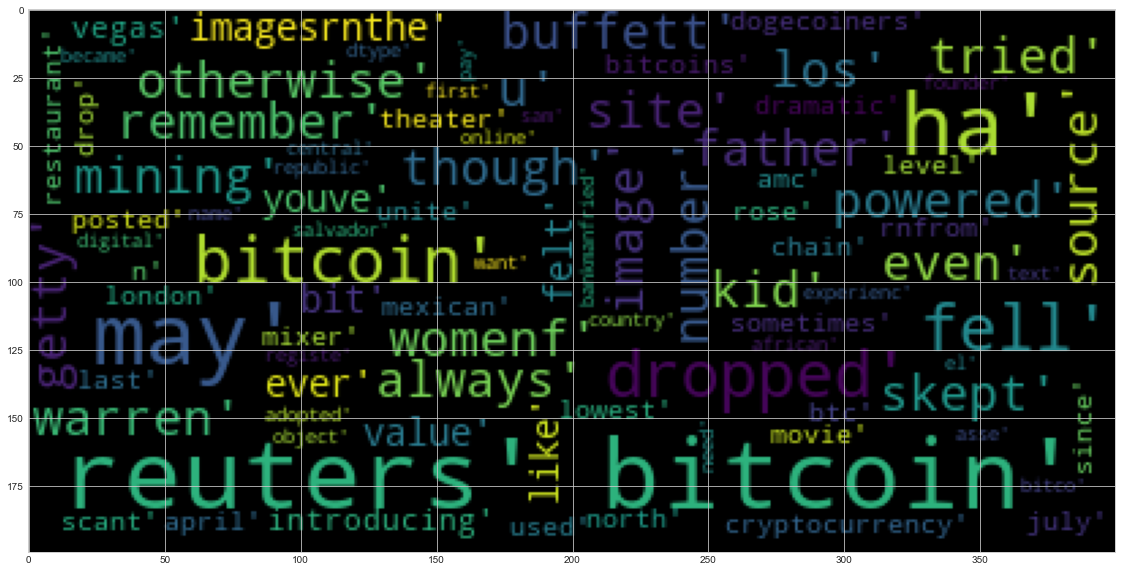

In [42]:
# Generate the Bitcoin word cloud
btc_txt=str(tokenizer(bitcoin_text))
cloud=WordCloud().generate(btc_txt)
plt.imshow(cloud)

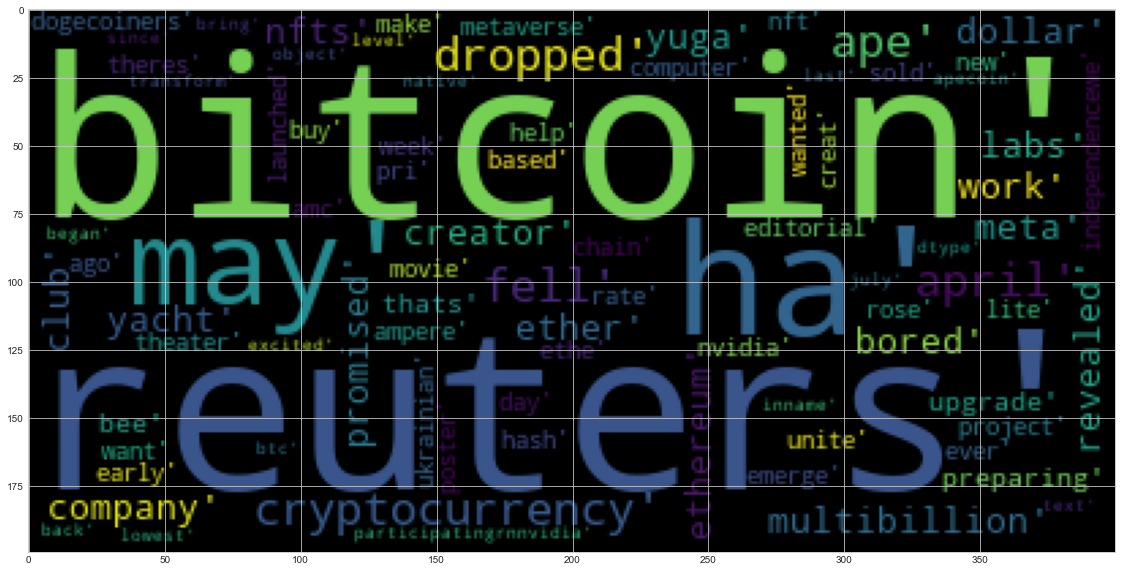

In [43]:
# Generate the Ethereum word cloud
eth_txt=str(tokenizer(ethereum_text))
cloud_eth=WordCloud().generate(eth_txt)
plt.imshow(cloud_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [45]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [46]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [47]:
# Concatenate all of the Bitcoin text together
concatebate_bitcoin=' '.join(bitcoin_df['text'])

In [49]:
# Run the NER processor on all of the text
doc=nlp(concatebate_bitcoin)

# Add a title to the document
doc.user_data['title']='Bitcoin News'

In [50]:
# Render the visualization
displacy.render(doc,style='ent')

In [53]:
# List all Entities
print([ent.text for ent in doc.ents])

['Odeniran', 'Linden', 'Texas', 'April 4th, 2022', 'Photo', 'FRANCOIS PICARD/AFP', 'Getty Images', 'Warren Buffett', 'the weekend', 'nearly three feet', 'Getty Images\r\n', 'the weekend', '34,000', '27,630', 'Coinbase', '+2164', 'Last week', 'Fidelity Investments', 'the US Treasury', 'last July', '33,000', 'the week', 'last week', 'Fed', 'April 26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', 'May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'Bitcoin', 'Gucci handbag', 'week', 'Kristy Kilburn', 'May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', 'May 9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'Mexican', 'North London', 'a few weeks ago', '+2779', 'May 10', 'Reuters', 'The Central African Republic', 'second', 'El Salvador', 'Wednesday', 'Faustin Archange', 'Touadera', 'Sam Bankman-Fried', 'the digital asset exchange', 'FTX', 'El 

---

### Ethereum NER

In [54]:
# Concatenate all of the Ethereum text together
concatebate_ethereum=' '.join(ethereum_df['text'])

In [55]:
# Run the NER processor on all of the text
doc_eth=nlp(concatebate_ethereum)

# Add a title to the document
doc_eth.user_data['title']='Ethereum News'

In [56]:
# Render the visualization
displacy.render(doc_eth,style='ent')

In [57]:
# List all Entities
print([ent.text for ent in doc_eth.ents])

['Meta', 'Instagram', 'US', 'Instagram', 'Ethereum', 'Yuga Labs', 'Yacht Club', 'Yuga Labs', 'Otherside NFT', 'April 30', 'NFT', '+6669', 'April 26', 'Reuters', 'No.2', 'second', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'Last night', 'Bloomberg', 'nearly a third', 'a billion dollars', 'Early this week', 'the Ukrainian Computer Emergency Response Team', 'Slovakian', 'Russia', '47,454', '34,007', '28%.About a third', 'this week', 'Nvidia', 'Ampere Lite Hash Rate', 'LHR', 'Ethereum', 'April 26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', 'May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', 'May 9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'NFT', 'Ethereum', 'Last week', '9', '8', 'Nvidia', 'LHR', 'last year\xa0', 'last July', '33,000', 'the week', 'last week', 'Fed', 'ApeCoin', '16%', 'Monday', '14.60', 'Transform 2022', 'Ju

---